# Assignment 1

## Exercise 1.1

rough sketch for ex 1.2:

1. define the „positive“ subspace P in the RGB cube
2. iterate over all pixels in I and check if in P or ~P
3. write result to new image
4. play around with size and shape of P and display binary image (**RESULT**)



A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


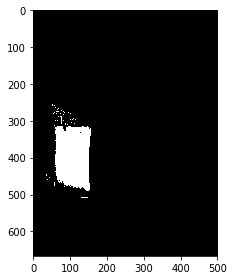

In [18]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np

image = io.imread('testbilder/1_klein.jpg')
schwellwert = [104,22,43]
bereich = 30

count_rows = image.shape[0]
count_collumns = image.shape[1]

new_image = np.empty_like(image)

for x in range(count_rows):
    for y in range(count_collumns):
        pixel = image[x][y]
        
        isRCase = (schwellwert[0] - bereich) < pixel[0] < (schwellwert[0] + bereich)
        isGCase = (schwellwert[1] - bereich) < pixel[1] < (schwellwert[1] + bereich)
        isBCase = (schwellwert[2] - bereich) < pixel[2] < (schwellwert[2] + bereich)
        if isRCase and isGCase and isBCase:
            new_image[x][y] = np.array([255,255,255])
        else:
            new_image[x][y] = np.array([0,0,0])

new_image[40][1] = np.array([0,0,0])
io.imshow(new_image)
io.imsave("1_klein.jpg",new_image)


## Exercise 1.2

* starting from the binary color detection image
* erase noise with an erosion operation
* dilate once to get original size of object
* find connected components with one-pass algorithm
* extract bounding box on the fly
* draw bounding box on original image (**RESULT**)

A:\Users\Antje\Anaconda3\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:51: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  out_of_range_float = (np.issubdtype(image.dtype, np.float) and


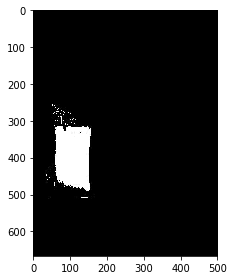

In [28]:
%matplotlib inline 
from skimage import io, data, color
import numpy as np

image = io.imread('1_klein.jpg')
#io.imshow(image)

def erosion (image):
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    new_image = np.empty_like(image)
    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl<1):
                    new_image[x][y] = np.array(black)

    #new_image[40][1] = np.array([0,0,0])
    io.imshow(new_image)
    #io.imsave("1_klein.jpg",new_image)

#erosion(image)

def dilate (image):#hauptsächlich kopie der oberen Funktion; einziger unterschied liegt beim kernel-if und dass weiß gemalt wird
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    new_image = np.empty_like(image)
    white=np.array([255,255,255])
    black=np.array([0,0,0])

    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                zahl=0
                for i in range(4):
                    if np.array_equal(kernel[i],white):
                        zahl+=1
                if (zahl>1):#oder >=
                    new_image[x][y] = np.array(white)

    #new_image[40][1] = np.array([0,0,0])
    io.imshow(new_image)
    #io.imsave("1_klein.jpg",new_image)
    
#dilate(image)

def components(image):
#nach beschreibung von "One component at a time" im Artikel "Connected-component labeling" vom englischen Wikipedia
    count_rows = image.shape[0]
    count_collumns = image.shape[1]

    new_image = np.empty_like(image)
    white=np.array([255,255,255])
    black=np.array([0,0,0])
    queue=[]
    component_list=[]
    component=[]
    comp_number=1
    
    for x in range(1, count_rows -1):
        for y in range(1, count_collumns -1):
            pixel = np.array(image[x][y])
            kernel = np.array([image[x + 1][y], image[x - 1][y],image[x][y - 1], image[x][ y + 1]])
            if np.array_equal(pixel,white):
                element=[x,y,comp_number]
                if element not in component:
                    component=component.append(element)
                    queue=queue.append(element)
                    while(queue != []):
                        elem= queue.pop()
                        kernel = np.array([image[elem[0] + 1][elem[1]], image[elem[0] - 1][elem[1]],image[elem[0]][elem[1] - 1], image[elem[0]][ elem[1] + 1]])
                        for i in range(4):
                            if () and () not in component:
                            
"""
leichtere lösung: matrix mit gleichen maßen des bildes mit nullen initialisieren, wenn matrix[x][y] vom nachbarn ==0 und weiß => kein teil einer komponente und muss bearbeiet werden
würde komponenten dennoch noch speichern, für das zeichnen der boundingbox(en); kleinster x-wert der komponente=l, grösstes x=r
kleinstes y=h, größtes=b
frage: wie bekomme ich die gewünschte matrix mit numpy hin?
"""                




## Exercise 1.3

* use your color detection and connected components algorithm
* implement simplest tracking algorithm
* draw history of all previous points on frame (**RESULT**)